# Excercise 1 Task 4: Preprocesing & Pipelines

The purpose of this task is to examine needed steps of preprocessing and the usefulness to execute these steps within a pipeline to simplify the general processing without the need to execute each step manually with a transforming dataset

In [15]:
# a) Import packages declared in ueb01 excercise 4
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFECV

In [29]:
# task a load breast cancer wisconsin dataset as csv after recognizing csv format ;-) See ueb01 exercise 01
# Replace header with numerical values for slicing
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
original_column_header = list(data)
# remove header from data and reindex axis
data.columns = range(data.shape[1])

In [30]:
# examining data
#data.tail(15)
data.head(15)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
5,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
6,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
7,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
8,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750
9,845636,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [31]:
# Examining shape of data for slicing
data.shape

(568, 32)

In [32]:
# Instantiating LabelEncoder and slicing of data into values and classification
label_encoder = LabelEncoder()
X = data.loc[:, 2:].values
Y = data.loc[:, 1].values

# b) encoding Malign (M) and Bengin (B) into 1 and 0
Y = label_encoder.fit_transform(Y)

In [33]:
# Check correct encoding
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0,

In [34]:
# c) Divide dataset into training and test data (80% training  and 20% test data)
test_size = 0.20
rand_state = 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=rand_state)

In [35]:
# d) + e) Building pipeline of transformer and estimators to calculate accuracy
standard_scaler = ('ss',StandardScaler())
pca = ('pcs', PCA(n_components=2))
logistic_regression = ('lr', LogisticRegression(random_state=rand_state))
pipeline = Pipeline([standard_scaler, pca, logistic_regression])
pipeline.fit(X_train, Y_train)
print('Accuracy: %.3f' % pipeline.score(X_test, Y_test))

Accuracy: 0.956


In [36]:
# f) Switching PCA for RFECV to determine valuable feature selections and estimating max accuracy instead of the PCA step
# Using formerly intruduces LogisticRegression classificator as estimator
lr = logistic_regression[1]
selector = RFECV(lr, step=1)
selector.fit(X_train, Y_train)

RFECV(cv=None,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [37]:
selector.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True], dtype=bool)

In [38]:
selector.ranking_

array([1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [43]:
standard_scaler = ('ss',StandardScaler())
# pca = ('pcs', PCA(n_components=2))
logistic_regression = ('lr', LogisticRegression(random_state=rand_state))
rfecv = RFECV(logistic_regression[1], step=1, scoring='accuracy')
selector = ('sel', rfecv)
pipeline = Pipeline([standard_scaler, selector, logistic_regression])
pipeline.fit(X_train, Y_train)
print('Accuracy: %.3f' % pipeline.score(X_test, Y_test))

Accuracy: 0.991


Now the results of RFECV are analysed

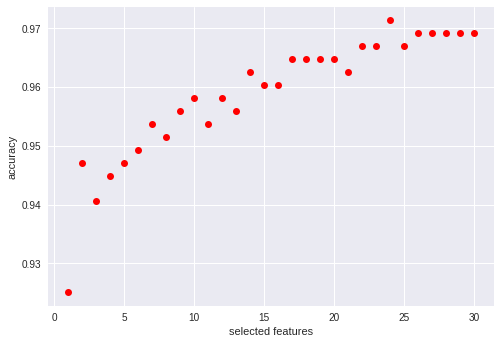

Highest accuracy is achieved with: 24 features
From the given 31 features named as in the original dataset:

['842302', 'M', '10.38', '1001', '0.1184', '0.2776', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '153.4', '0.04904', '0.05373', '0.01587', '0.03003', '0.006193', '25.38', '17.33', '184.6', '0.1622', '0.6656', '0.7119', '0.2654']

The pipeline reaches with RFECV a maximum accuracy of: 0.991228070175


In [53]:
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, "ro")
plt.xlabel("selected features")
plt.ylabel("accuracy")
plt.show()
print("Highest accuracy is achieved with: %s features" % rfecv.n_features_)

print("From the given 31 features named as in the original dataset:\n")
i = 0
features = [original_column_header[i] for i, v in enumerate(rfecv.support_) if rfecv.support_[i]]
print(features)
accuracy = pipeline.score(X_test, Y_test)
print("\nThe pipeline reaches with RFECV a maximum accuracy of:", accuracy)